In [76]:
import numpy as np
import pandas as pd
import plotly.express as py
import matplotlib.pyplot as plt
import os
import unidecode
import seaborn as sns

In [77]:
def filter_dataset_disasters(df):
    return df[['country', 'year', 'geolocation', 'disastertype', 'latitude', 'longitude']]

In [78]:
pathDisasters = "/home/linux/NASA-Space-Apps/datasets/pend-gdis-1960-2018-disasterlocations.csv"
pathDisastersJson = "/home/linux/NASA-Space-Apps/datasets/disasters.json"

In [79]:
if not os.path.exists(pathDisasters):
    print(f"No se encontró el archivo: {pathDisasters}")
    exit()

In [80]:
df = filter_dataset_disasters(pd.read_csv(pathDisasters))
df

,country,year,geolocation,disastertype,latitude,longitude
0,Albania,2009,Ana E Malit,flood,42.020948,19.418317
1,Albania,2009,Bushat,flood,41.959294,19.514309
2,Angola,2001,Onjiva,flood,-17.093484,15.665758
3,Angola,2009,Evale,flood,-16.531533,15.773987
4,Angola,2009,Mupa,flood,-16.200065,15.844189
...,...,...,...,...,...,...
39948,Dominica,2015,Saint Patrick,storm,15.282063,-61.291589
39949,Dominica,2015,Saint Andrew,storm,15.541065,-61.350601
39950,Dominica,2015,Saint George,storm,15.308003,-61.343527
39951,Dominica,2015,Saint David,storm,15.413059,-61.282094


In [81]:
def filterData(df, **kwargs):
    for key, value in kwargs.items():
        if value is not None:
            df = df[df[key] == value]
    return df

In [82]:
def plot_histogram(df, title='Histograma'):
    fig = py.histogram(df, x='Value', nbins=30, title=title)
    fig.update_layout(xaxis_title='Valor', yaxis_title='Frecuencia')
    fig.show()

In [83]:
# Ejemplo 1: Filtrar datos y graficar un histograma para ciudades específicas
disastertype = 'flood'  # Nombre exacto de la hoja
countries = "Colombia" # si se ponen mas de un pais, crash
#cities = ['Buenos Aires', 'Rio De Janeiro']
start_year = 2010
end_year = 2015

# Filtrar datos
filtered_df = filterData(
    df,
    disastertype = disastertype,
    country = countries,
    #cities=cities,
    year = 2009
)

In [84]:
def plotGeneralHistrogram(df, disaster, minChanger):
    changerCount = df[df['disastertype'] == disaster].groupby('country').size().reset_index(name='changerCount')


    # Filtrar los países que tengan más de X terremotos (por ejemplo, 1)
    changerCountFiltered = changerCount[changerCount['changerCount'] > minChanger]

    # Ordenar los países por el número de terremotos (de menor a mayor)
    changerCountFiltered = changerCountFiltered.sort_values(by='changerCount', ascending=True)

    # Crear gráfico de barras con Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='country', y='changerCount', data=changerCountFiltered, palette='viridis')

    # Añadir los valores sobre las barras
    for i in ax.containers:
        ax.bar_label(i)

    # Colocar los nombres de los países en vertical
    plt.xticks(rotation=90)

    # Añadir títulos y etiquetas
    ax.set_title(f'Count of {disaster} by Country')
    ax.set_xlabel('Country')
    ax.set_ylabel(f'{disaster} Count')

    # Mostrar gráfico
    plt.show()
    return None

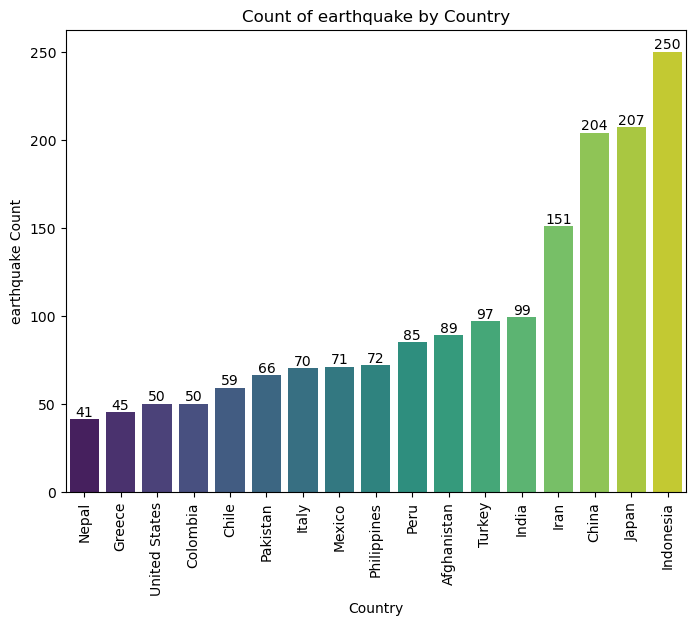

In [85]:
plotGeneralHistrogram(df, "earthquake", 40)

In [86]:
def plot_disaster_locations(df, year):
    df_year = df[df['year'] == year]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitude', y='latitude', hue='disastertype', data=df_year)
    plt.title(f'Disaster locations in {year}')
    plt.show()

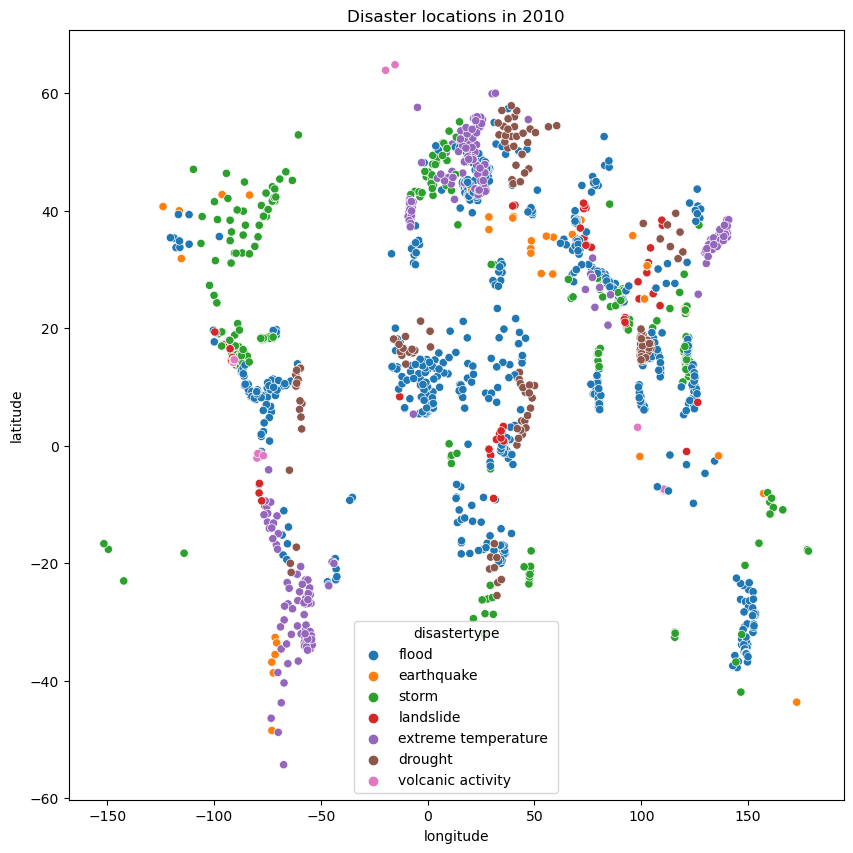

In [87]:
plot_disaster_locations(df, 2010)

In [29]:
import plotly.express as px
import pandas as pd

# Ejemplo de DataFrame con los datos
data = {
    'year': [2020, 2021,2021, 2022, 2020, 2021],
    'country': ['Argentina', 'Argentina', 'Brazil', 'Chile', 'Argentina', 'Brazil'],
    'disastertype': ['earthquake', 'flood','flood', 'fire', 'fire', 'earthquake'],
    'latitude': [-34.61, -34.61, -15.78, -33.45, -34.58, -22.91],
    'longitude': [-58.38, -58.38, -47.93, -70.65, -58.41, -43.17]
}
df = pd.DataFrame(data)

# Crear el mapa choropleth para los países
fig = px.choropleth(df, 
                    locations="country", 
                    locationmode='country names',  # Utiliza nombres de países
                    color="country", 
                    title="Disasters by Country",
                    scope="world")

# Agregar los puntos de los desastres usando scatter_geo
scatter = px.scatter_geo(df, 
                         lat="latitude", 
                         lon="longitude", 
                         hover_name="disastertype",  # Mostrar el tipo de desastre al pasar el ratón
                         color="disastertype", 
                         size_max=15, 
                         title="Disasters by Location")

# Combinar el choropleth y el scatter plot
fig.add_traces(scatter.data)

# Mostrar el gráfico
fig.show()


In [68]:
import plotly.express as px
import pandas as pd

# Ejemplo de DataFrame con los datos
data = {
    'year': [2020, 2021, 2022, 2020, 2021],
    'country': ['Argentina', 'Brazil', 'Chile', 'Argentina', 'Brazil'],
    'disastertype': ['earthquake', 'flood', 'fire', 'fire', 'earthquake'],
    'latitude': [-34.61, -15.78, -33.45, -34.58, -22.91],
    'longitude': [-58.38, -47.93, -70.65, -58.41, -43.17]
}
df = pd.DataFrame(data)

# Crear el mapa choropleth para los países
fig = px.choropleth(df, 
                    locations="country", 
                    locationmode='country names',  # Utiliza nombres de países
                    color="country", 
                    title="Disasters by Country",
                    scope="world")


# Agregar los puntos de los desastres usando scatter_geo, con más interactividad
scatter = px.scatter_geo(df, 
                         lat="latitude", 
                         lon="longitude", 
                         hover_name="disastertype",  # Mostrar el tipo de desastre al pasar el ratón
                         hover_data={"year": True, "country": True},  # Añadir año y país en el hover
                         color="disastertype", 
                         size=[50, 60, 40, 70, 80],  # Ajustar tamaño de los círculos
                         size_max=40,  # Aumentar el tamaño máximo de los círculos
                         title="Disasters by Location")

# Combinar el choropleth y el scatter plot
fig.add_traces(scatter.data)

# Mostrar el gráfico
fig.show()


In [ ]:

# Crear el mapa choropleth para los países
fig = px.choropleth(df, 
                    locations="country", 
                    locationmode='country names',  # Utiliza nombres de países
                    color="country", 
                    title="Disasters by Country",
                    scope="world")

fig.show()